Загрузка данных

In [ ]:
! pip install MulticoreTSNE wurlitzer umap-learn dataget
%load_ext wurlitzer

from sklearn.datasets import load_digits
import dataget
import gensim.downloader as api
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns


mnist = load_digits()
_, __, fashion_mnist_test, fashion_mnist_y_test = dataget.image.fashion_mnist().get()
fashion_mnist = fashion_mnist_test.reshape(-1, 28*28)

In [ ]:
!wget https://jundongl.github.io/scikit-feature/files/datasets/COIL20.mat?raw=true
!mv COIL20.mat?raw=true coil.mat

from scipy import io
mat = io.loadmat('coil.mat')
coil20 = mat['X']
coil20.shape

Алгоритмы

In [5]:
from MulticoreTSNE import MulticoreTSNE as TSNE
from sklearn.decomposition import PCA
from umap import UMAP

tsne = TSNE(n_jobs=-1)
pca = PCA(n_components=2)
umap = UMAP()

algs = [umap, tsne, pca]

In [8]:
def draw_plot(fig, title, embeddings, target, ax):
  vis_x = embeddings[:, 0]
  vis_y = embeddings[:, 1]
  if target.size!=0:
    scatter = ax.scatter(vis_x, vis_y, c=target, cmap='Spectral', marker='.') 
  else:
    scatter = ax.scatter(vis_x, vis_y, marker='.')
  ax.set_title(title)

  fig.colorbar(scatter, ax=ax)

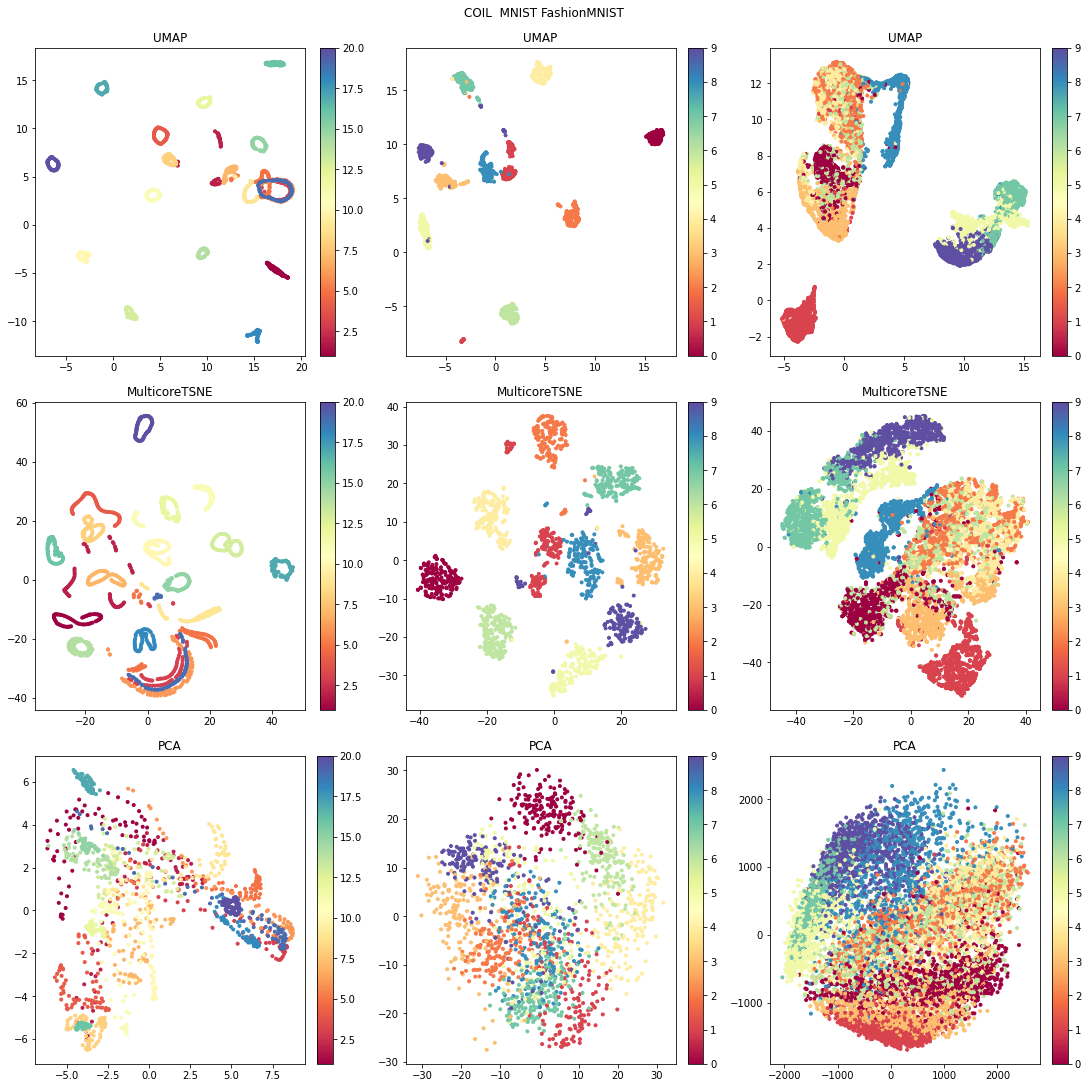

In [9]:
plt.rcParams["figure.figsize"] = (15,15)

fig, ((ax1, ax2, ax3), (ax5, ax6, ax7), (ax9, ax10, ax11)) = plt.subplots(
    3, 3, constrained_layout=True
)

# --------------COIL
data, target, axes = coil20, mat['Y'], [ax1, ax5, ax9]
for alg, ax in np.vstack([algs, axes]).T:
  x_transformed = alg.fit_transform(data)
  draw_plot(fig, type(alg).__name__, x_transformed, target, ax)

# --------------MNIST
data, target, axes = mnist.data, mnist.target, [ax2, ax6, ax10]
for alg, ax in np.vstack([algs, axes]).T:
  x_transformed = alg.fit_transform(data)
  draw_plot(fig, type(alg).__name__, x_transformed, target, ax)

# --------------FASHION MNIST
data, target, axes = fashion_mnist, fashion_mnist_y_test, [ax3, ax7, ax11]
for alg, ax in np.vstack([algs, axes]).T:
  x_transformed = alg.fit_transform(data)
  draw_plot(fig, type(alg).__name__, x_transformed, target, ax)


fig.suptitle('COIL  MNIST FashionMNIST')
plt.show()

In [11]:
import gensim.downloader as api
googlenews = api.load("word2vec-google-news-300")

[==================================================] 100.0% 1662.8/1662.8MB downloaded


tcmalloc: large alloc 3600007168 bytes == 0x5603d01f8000 @  0x7f9ea3889001 0x7f9e9acbc54f 0x7f9e9ad0cb58 0x7f9e9ad10b17 0x7f9e9adaf203 0x5603afee3544 0x5603afee3240 0x5603aff57627 0x5603aff51ced 0x5603afee4bda 0x5603aff53737 0x5603aff519ee 0x5603afee4bda 0x5603aff53737 0x5603afee4afa 0x5603aff56d00 0x5603aff519ee 0x5603afee4bda 0x5603aff56d00 0x5603aff519ee 0x5603aff516f3 0x5603aff4fb60 0x5603afee3349 0x5603afee3240 0x5603aff56973 0x5603aff519ee 0x5603afee4bda 0x5603aff52c0d 0x5603aff519ee 0x5603afee4bda 0x5603aff53737


In [13]:
import numpy as np
import matplotlib.pyplot as plt

googleVectors = googlenews.wv.vectors
google = googleVectors[np.random.randint(googleVectors.shape[0], 
                size=int(googleVectors.shape[0]/40)), :]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  after removing the cwd from sys.path.


In [14]:
def plot_one_result(fig, title, embeddings, target, ax):
  vis_x = embeddings[:, 0]
  vis_y = embeddings[:, 1]
  if target.size!=0:
    scatter = ax.scatter(vis_x, vis_y, alpha=0.3, c=target, cmap='Spectral', marker='.')
  else:
    scatter = ax.scatter(vis_x, vis_y, alpha=0.3, marker='.')
  ax.set_title(title)

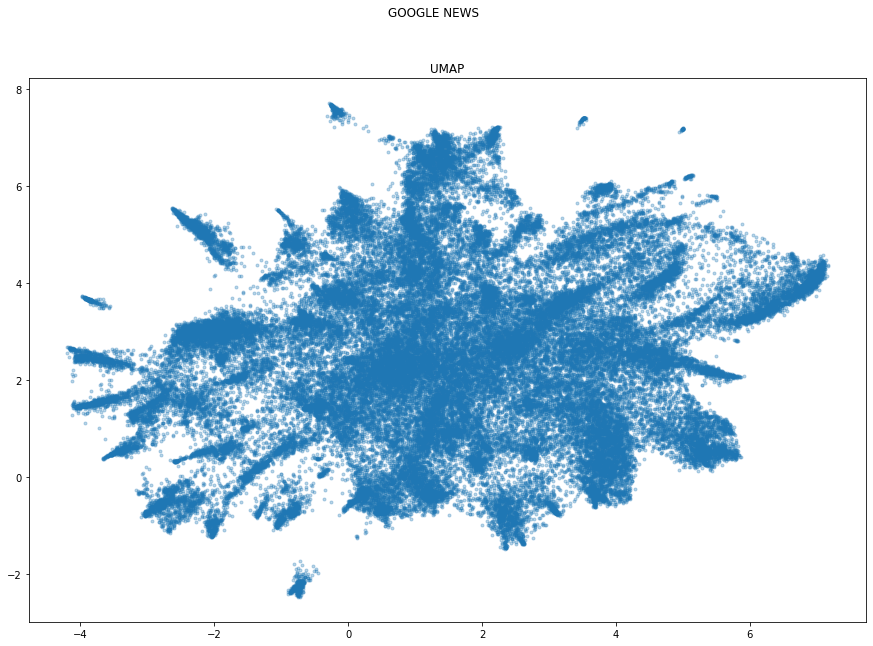

In [16]:
plt.rcParams["figure.figsize"] = (15,10)
fig, ax = plt.subplots()
x_transformed = algs[0].fit_transform(google)
plot_one_result(fig, type(algs[0]).__name__, x_transformed, np.array([]), ax)
fig.suptitle('GOOGLE NEWS')
plt.show()

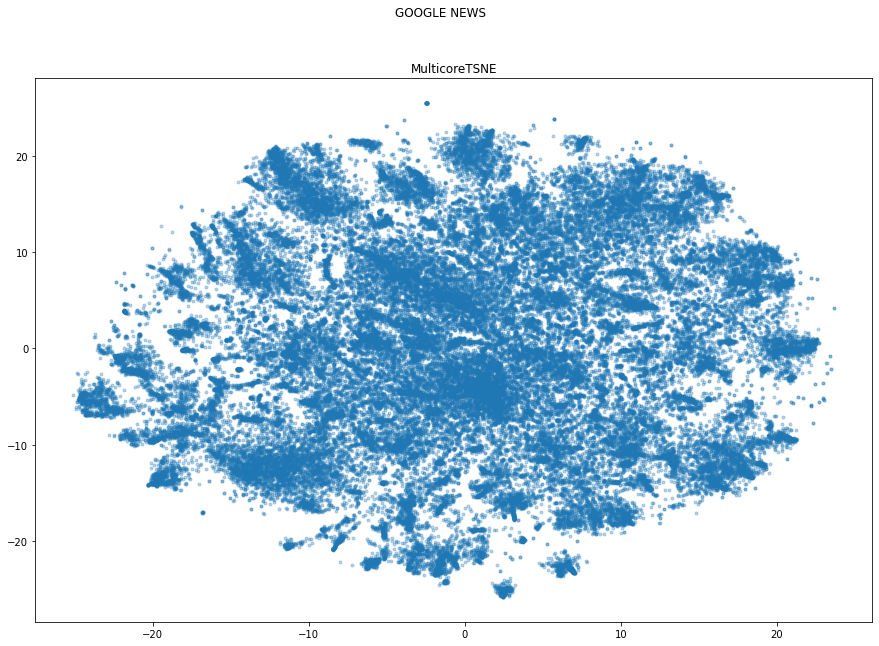

In [18]:
fig, ax = plt.subplots()
x_transformed = algs[1].fit_transform(google)
plot_one_result(fig, type(algs[1]).__name__, x_transformed, np.array([]), ax)
fig.suptitle('GOOGLE NEWS')
plt.show()

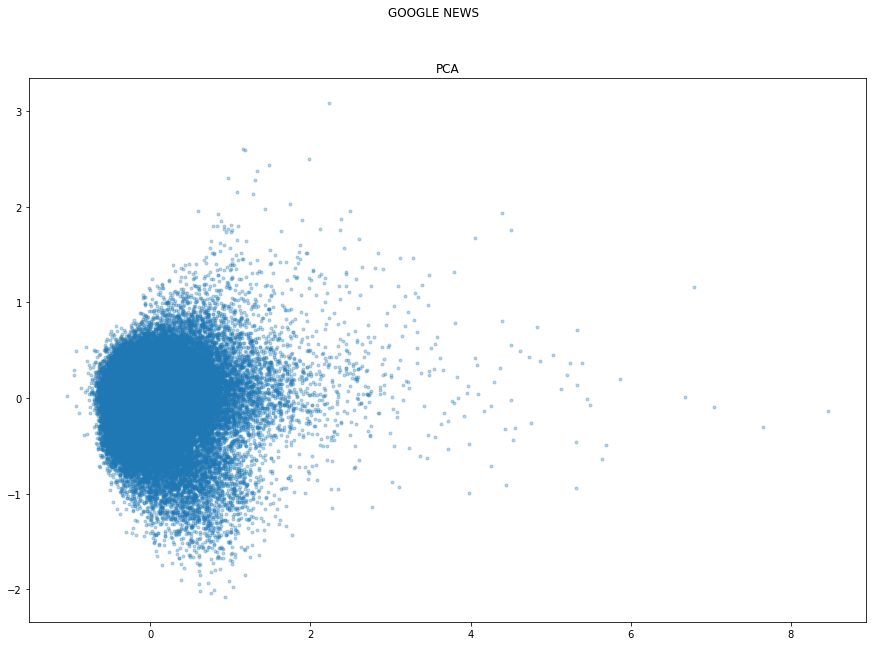

In [19]:
fig, ax = plt.subplots()
x_transformed = algs[2].fit_transform(google)
plot_one_result(fig, type(algs[2]).__name__, x_transformed, np.array([]), ax)
fig.suptitle('GOOGLE NEWS')
plt.show()

Анализ


Время работы:


*   UMAP: 125 s
*   TSNE: 2553 s
*   PCA: 3 s



